In [ ]:
!pip install pandas scikit-learn keras

## Import necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Data Preprocessing for the given polarity dataset


In [ ]:
# Read files in binary mode and decode
def read_file(file_path):
    with open(file_path, 'rb') as f:
        return f.read().decode('ISO-8859-1', errors='replace')

positive_data = pd.DataFrame({'text': read_file('rt-polarity.pos').splitlines()})
negative_data = pd.DataFrame({'text': read_file('rt-polarity.neg').splitlines()})


In [ ]:
# Create labels
positive_data['label'] = 1
negative_data['label'] = 0

In [ ]:
# Combine datasets
data = pd.concat([positive_data, negative_data])

In [ ]:
# Split the data
train_data, temp_data = train_test_split(data, test_size=0.25, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data['text'])
X_val = vectorizer.transform(val_data['text'])
X_test = vectorizer.transform(test_data['text'])

## Training

In [19]:
# Model Training
model = LogisticRegression()
model.fit(X_train, train_data['label'])

LogisticRegression()

## Testing & Evaluation

In [20]:
# Evaluation
y_pred = model.predict(X_test)

In [21]:
# Detailed Classification Report
report = classification_report(test_data['label'], y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print the classification report
print("### Classification Report ###")
print(report_df)

# Confusion Matrix
conf_matrix = confusion_matrix(test_data['label'], y_pred)

### Classification Report ###
              precision    recall  f1-score      support
0              0.770393  0.754438  0.762332   676.000000
1              0.754074  0.770045  0.761976   661.000000
accuracy       0.762154  0.762154  0.762154     0.762154
macro avg      0.762233  0.762242  0.762154  1337.000000
weighted avg   0.762325  0.762154  0.762156  1337.000000


## Printing the Top 10 Positive and Negative Words

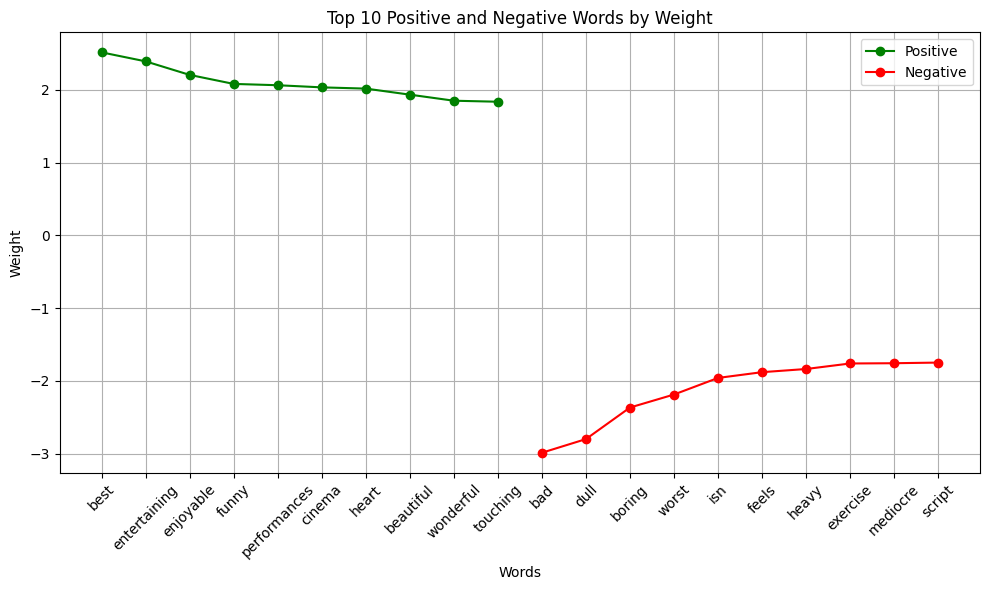

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from the TfidfVectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the coefficients (weights) from the trained Logistic Regression model
coef = model.coef_[0]

# Create a dataframe of words and their respective weights
words_df = pd.DataFrame({
    'word': feature_names,
    'weight': coef
})

# Sort words based on their weights to find the most influential for each class
positive_words = words_df.sort_values(by='weight', ascending=False).head(10)  # Top positive words
negative_words = words_df.sort_values(by='weight', ascending=True).head(10)  # Top negative words

# Plot the positive and negative words on a line chart

# Plot positive words (green)
plt.figure(figsize=(10, 6))
plt.plot(positive_words['word'], positive_words['weight'], marker='o', color='green', label='Positive')

# Plot negative words (blue)
plt.plot(negative_words['word'], negative_words['weight'], marker='o', color='red', label='Negative')

# Add title and labels
plt.title('Top 10 Positive and Negative Words by Weight')
plt.xlabel('Words')
plt.ylabel('Weight')
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## Plotting the Results

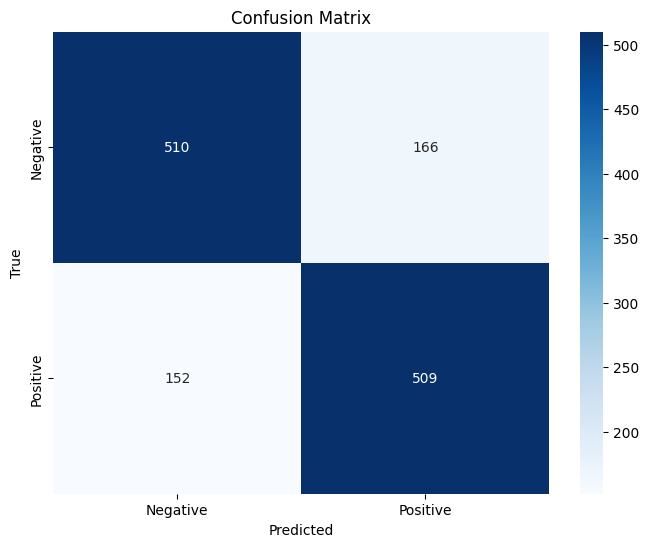

<ipython-input-13-5038aed3672e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index[:-1], y=report_df['f1-score'][:-1], palette='viridis')


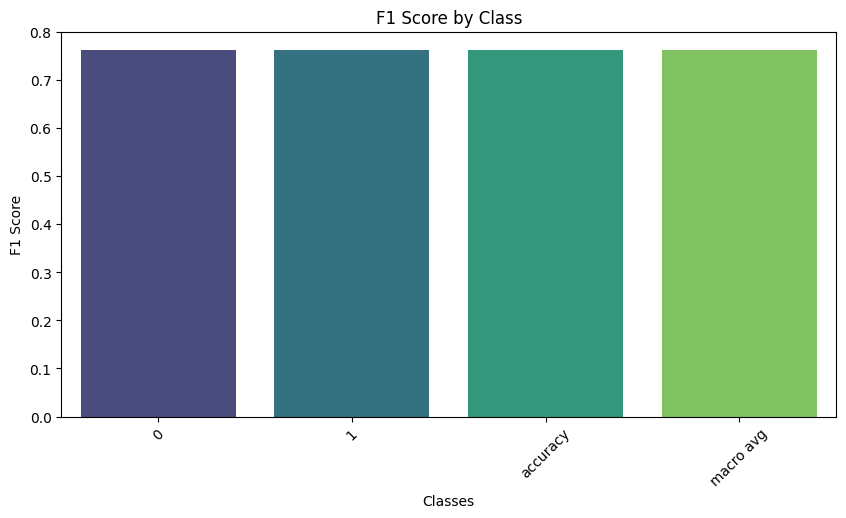

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Metrics Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=report_df.index[:-1], y=report_df['f1-score'][:-1], palette='viridis')
plt.title('F1 Score by Class')
plt.xlabel('Classes')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

## Comparing Logistic Regression with Random Forest and SVM models

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

### Classification Report for Logistic Regression ###
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       676
           1       0.75      0.77      0.76       661

    accuracy                           0.76      1337
   macro avg       0.76      0.76      0.76      1337
weighted avg       0.76      0.76      0.76      1337



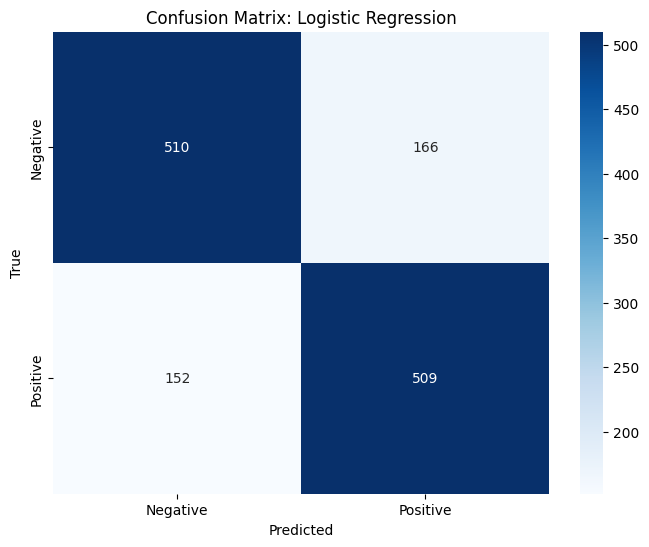

### Classification Report for Support Vector Machine ###
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       676
           1       0.75      0.77      0.76       661

    accuracy                           0.76      1337
   macro avg       0.76      0.76      0.76      1337
weighted avg       0.76      0.76      0.76      1337



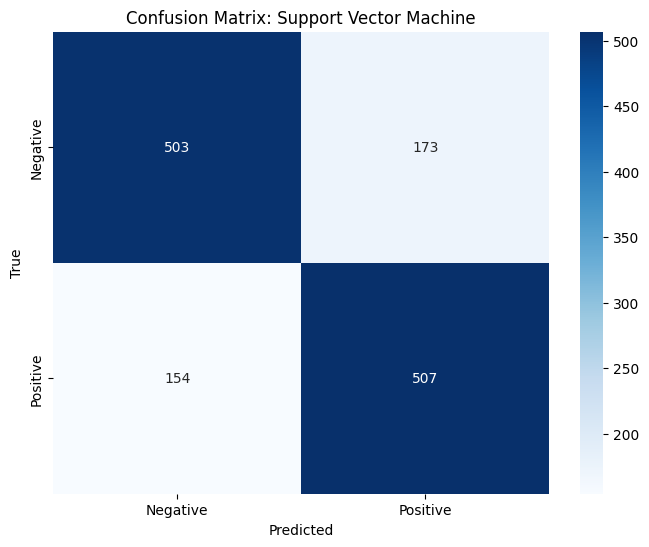

### Classification Report for Random Forest ###
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       676
           1       0.75      0.69      0.71       661

    accuracy                           0.73      1337
   macro avg       0.73      0.73      0.73      1337
weighted avg       0.73      0.73      0.73      1337



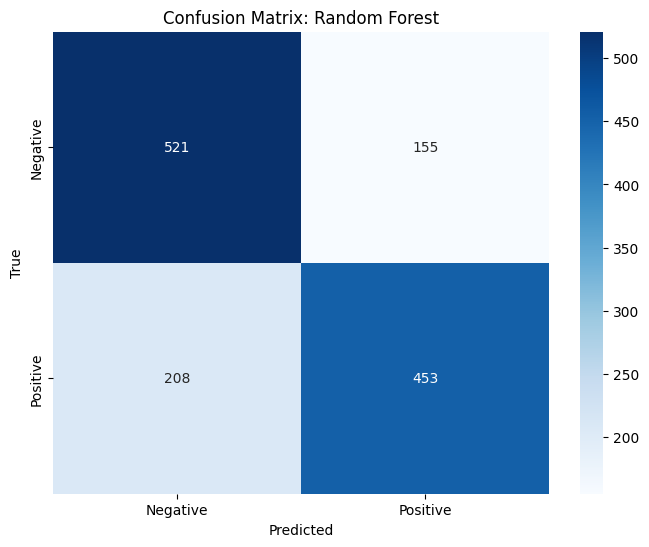

In [ ]:
# Evaluate models and store results
results = {}

for model_name, model in models.items():
    model.fit(X_train, train_data['label'])
    y_pred = model.predict(X_test)

    # Get classification report
    report = classification_report(test_data['label'], y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    results[model_name] = f1_score

    # Print the classification report for each model
    print(f"### Classification Report for {model_name} ###")
    print(classification_report(test_data['label'], y_pred))

    # Print confusion matrix for each model
    conf_matrix = confusion_matrix(test_data['label'], y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

<ipython-input-16-ce6a5dbdf570>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


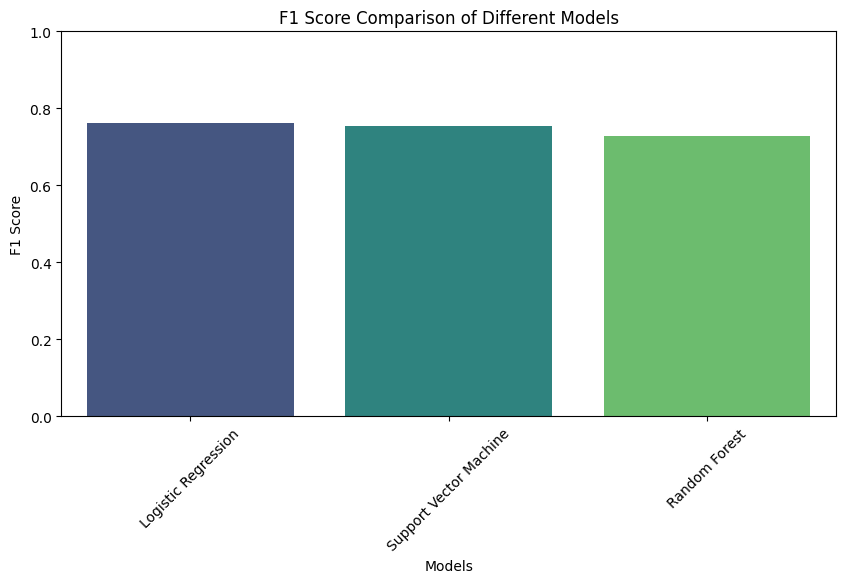

In [ ]:
# Plot comparison of F1 scores
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('F1 Score Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()